version 1

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import math
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv', index_col=0)
df.head()

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
Name,,,,,,,,,,,,,,,
Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16719 entries, Wii Sports to Winning Post 8 2016
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Platform         16719 non-null  object 
 1   Year_of_Release  16450 non-null  float64
 2   Genre            16717 non-null  object 
 3   Publisher        16665 non-null  object 
 4   NA_Sales         16719 non-null  float64
 5   EU_Sales         16719 non-null  float64
 6   JP_Sales         16719 non-null  float64
 7   Other_Sales      16719 non-null  float64
 8   Global_Sales     16719 non-null  float64
 9   Critic_Score     8137 non-null   float64
 10  Critic_Count     8137 non-null   float64
 11  User_Score       10015 non-null  object 
 12  User_Count       7590 non-null   float64
 13  Developer        10096 non-null  object 
 14  Rating           9950 non-null   object 
dtypes: float64(9), object(6)
memory usage: 2.0+ MB


#### Removing null values and changing Year_of_Release to type int

In [4]:
#drop variables w too many null values
df = df.drop(columns=["Critic_Score", "Critic_Count", "User_Score", "User_Count", "Developer", "Rating"])

#drop null rows
df.dropna(subset=['Year_of_Release','Genre', 'Publisher'], inplace=True)

#clean year column - convert to int
df["Year_of_Release"] = df["Year_of_Release"].astype(int)

#remove Wii Sports since it is a very far outlier (more than twice amt of sales than 2nd place)
df.drop(index=df.index[0], inplace=True)
df.head()

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Name,,,,,,,,,
Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


In [5]:
df.info() #check if null values removed

<class 'pandas.core.frame.DataFrame'>
Index: 16415 entries, Super Mario Bros. to Winning Post 8 2016
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Platform         16415 non-null  object 
 1   Year_of_Release  16415 non-null  int32  
 2   Genre            16415 non-null  object 
 3   Publisher        16415 non-null  object 
 4   NA_Sales         16415 non-null  float64
 5   EU_Sales         16415 non-null  float64
 6   JP_Sales         16415 non-null  float64
 7   Other_Sales      16415 non-null  float64
 8   Global_Sales     16415 non-null  float64
dtypes: float64(5), int32(1), object(3)
memory usage: 1.2+ MB


In [6]:
numdf = df[["Year_of_Release", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]]
numdf.head()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Name,,,,,,
Super Mario Bros.,1985,29.08,3.58,6.81,0.77,40.24
Mario Kart Wii,2008,15.68,12.76,3.79,3.29,35.52
Wii Sports Resort,2009,15.61,10.93,3.28,2.95,32.77
Pokemon Red/Pokemon Blue,1996,11.27,8.89,10.22,1.00,31.37
Tetris,1989,23.20,2.26,4.22,0.58,30.26


In [7]:
catdf = df[["Platform", "Genre", "Publisher"]]
catdf.head()

,Platform,Genre,Publisher
Name,,,
Super Mario Bros.,NES,Platform,Nintendo
Mario Kart Wii,Wii,Racing,Nintendo
Wii Sports Resort,Wii,Sports,Nintendo
Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo
Tetris,GB,Puzzle,Nintendo


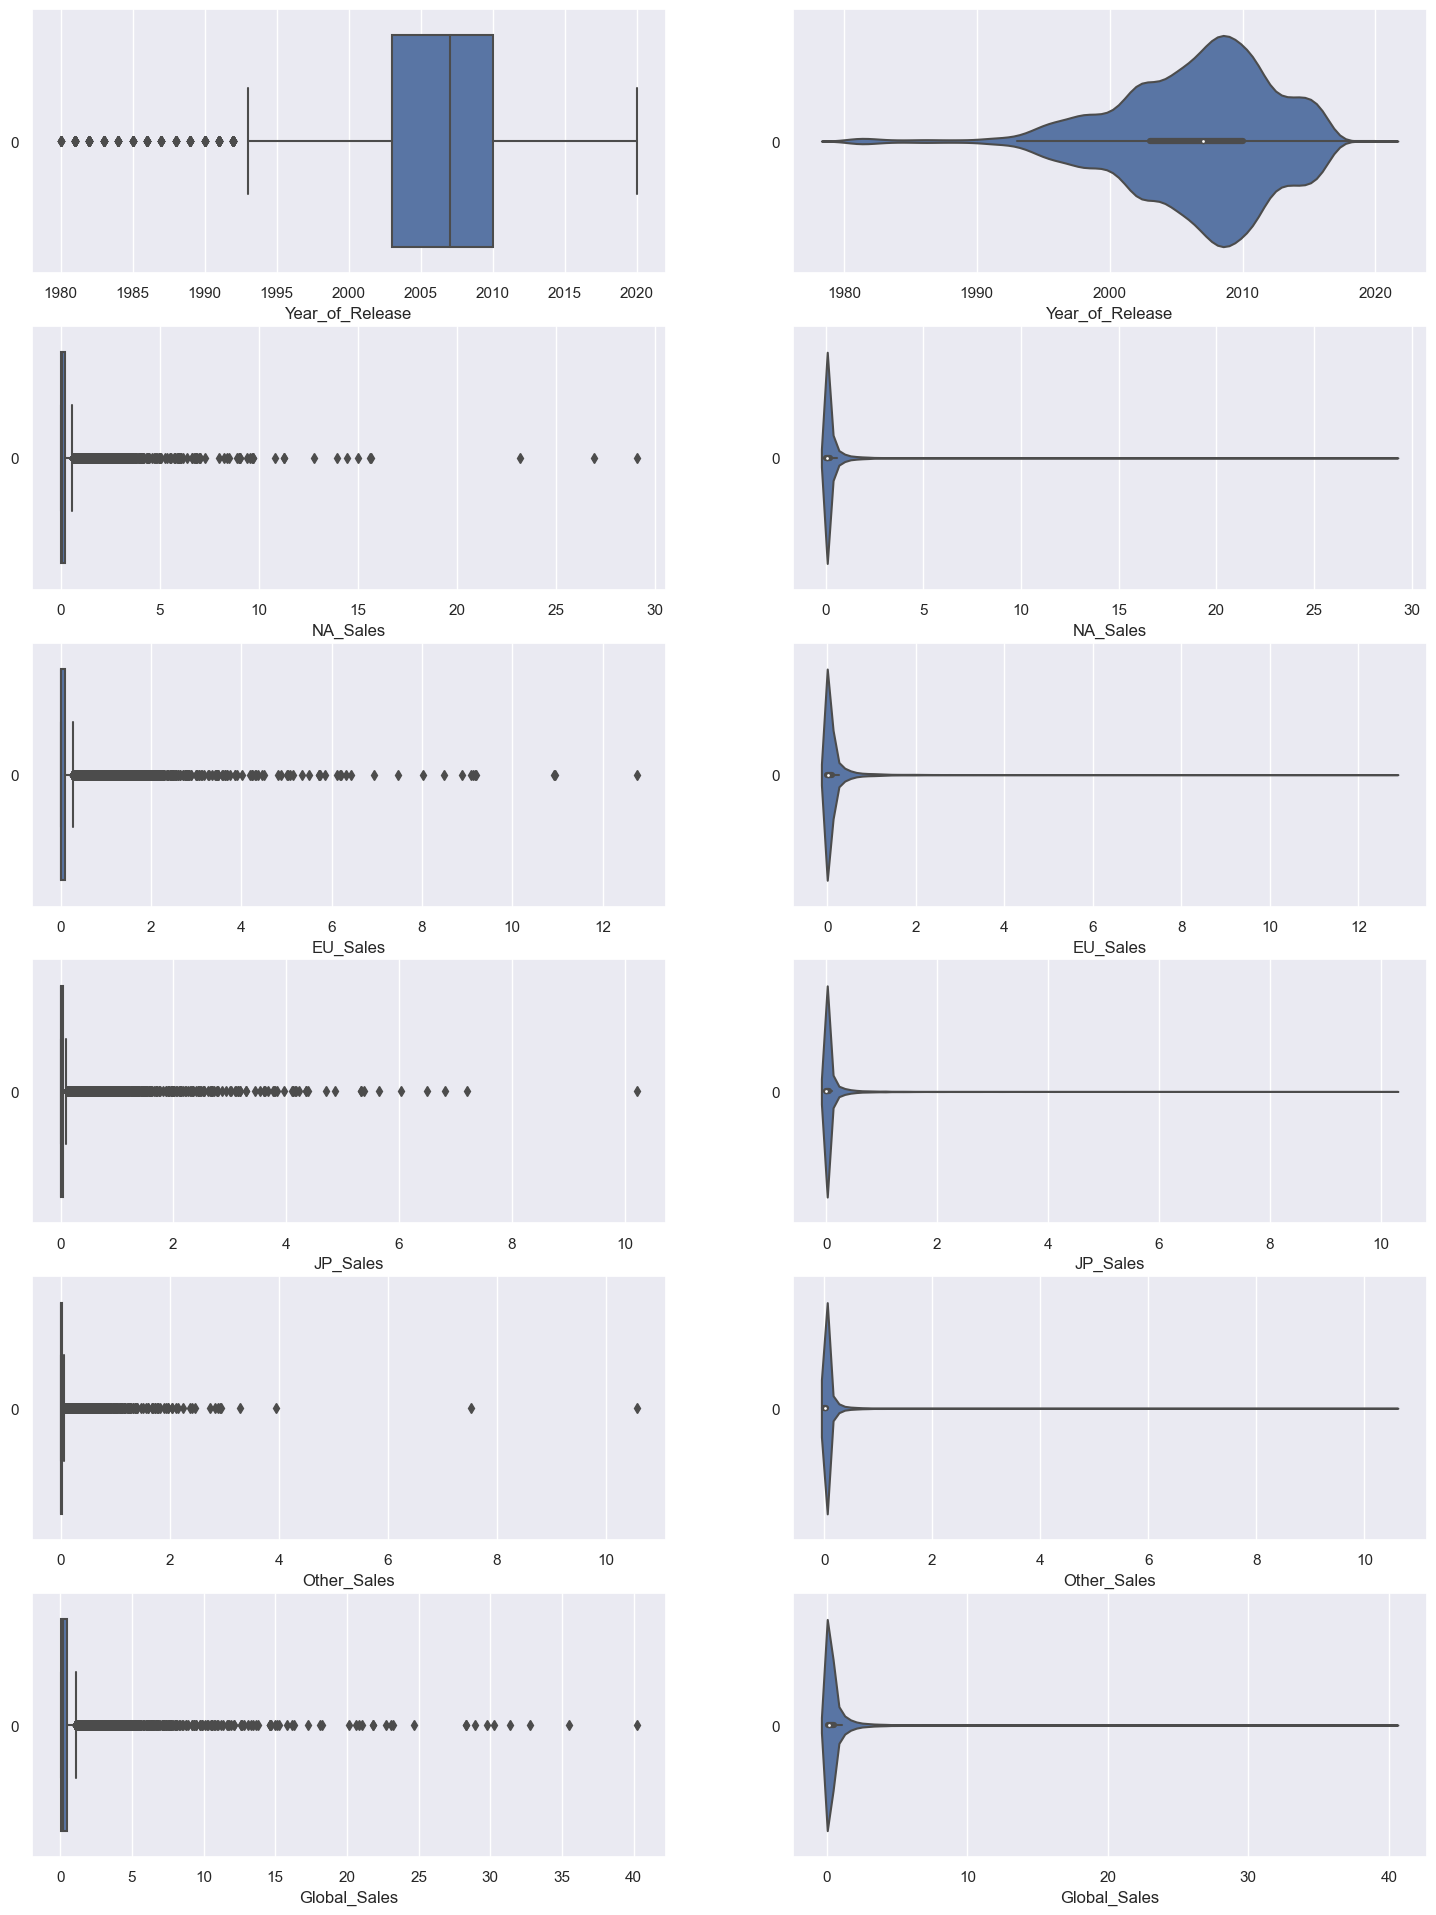

In [8]:
f, axes = plt.subplots(6, 2, figsize=(18, 24))

count = 0
for var in numdf:
    sb.boxplot(data = numdf[var], orient = "h", ax = axes[count,0])
    axes[count, 0].set_xlabel(var)
    sb.violinplot(data = numdf[var], orient = "h", ax = axes[count,1])
    axes[count, 1].set_xlabel(var)
    count += 1

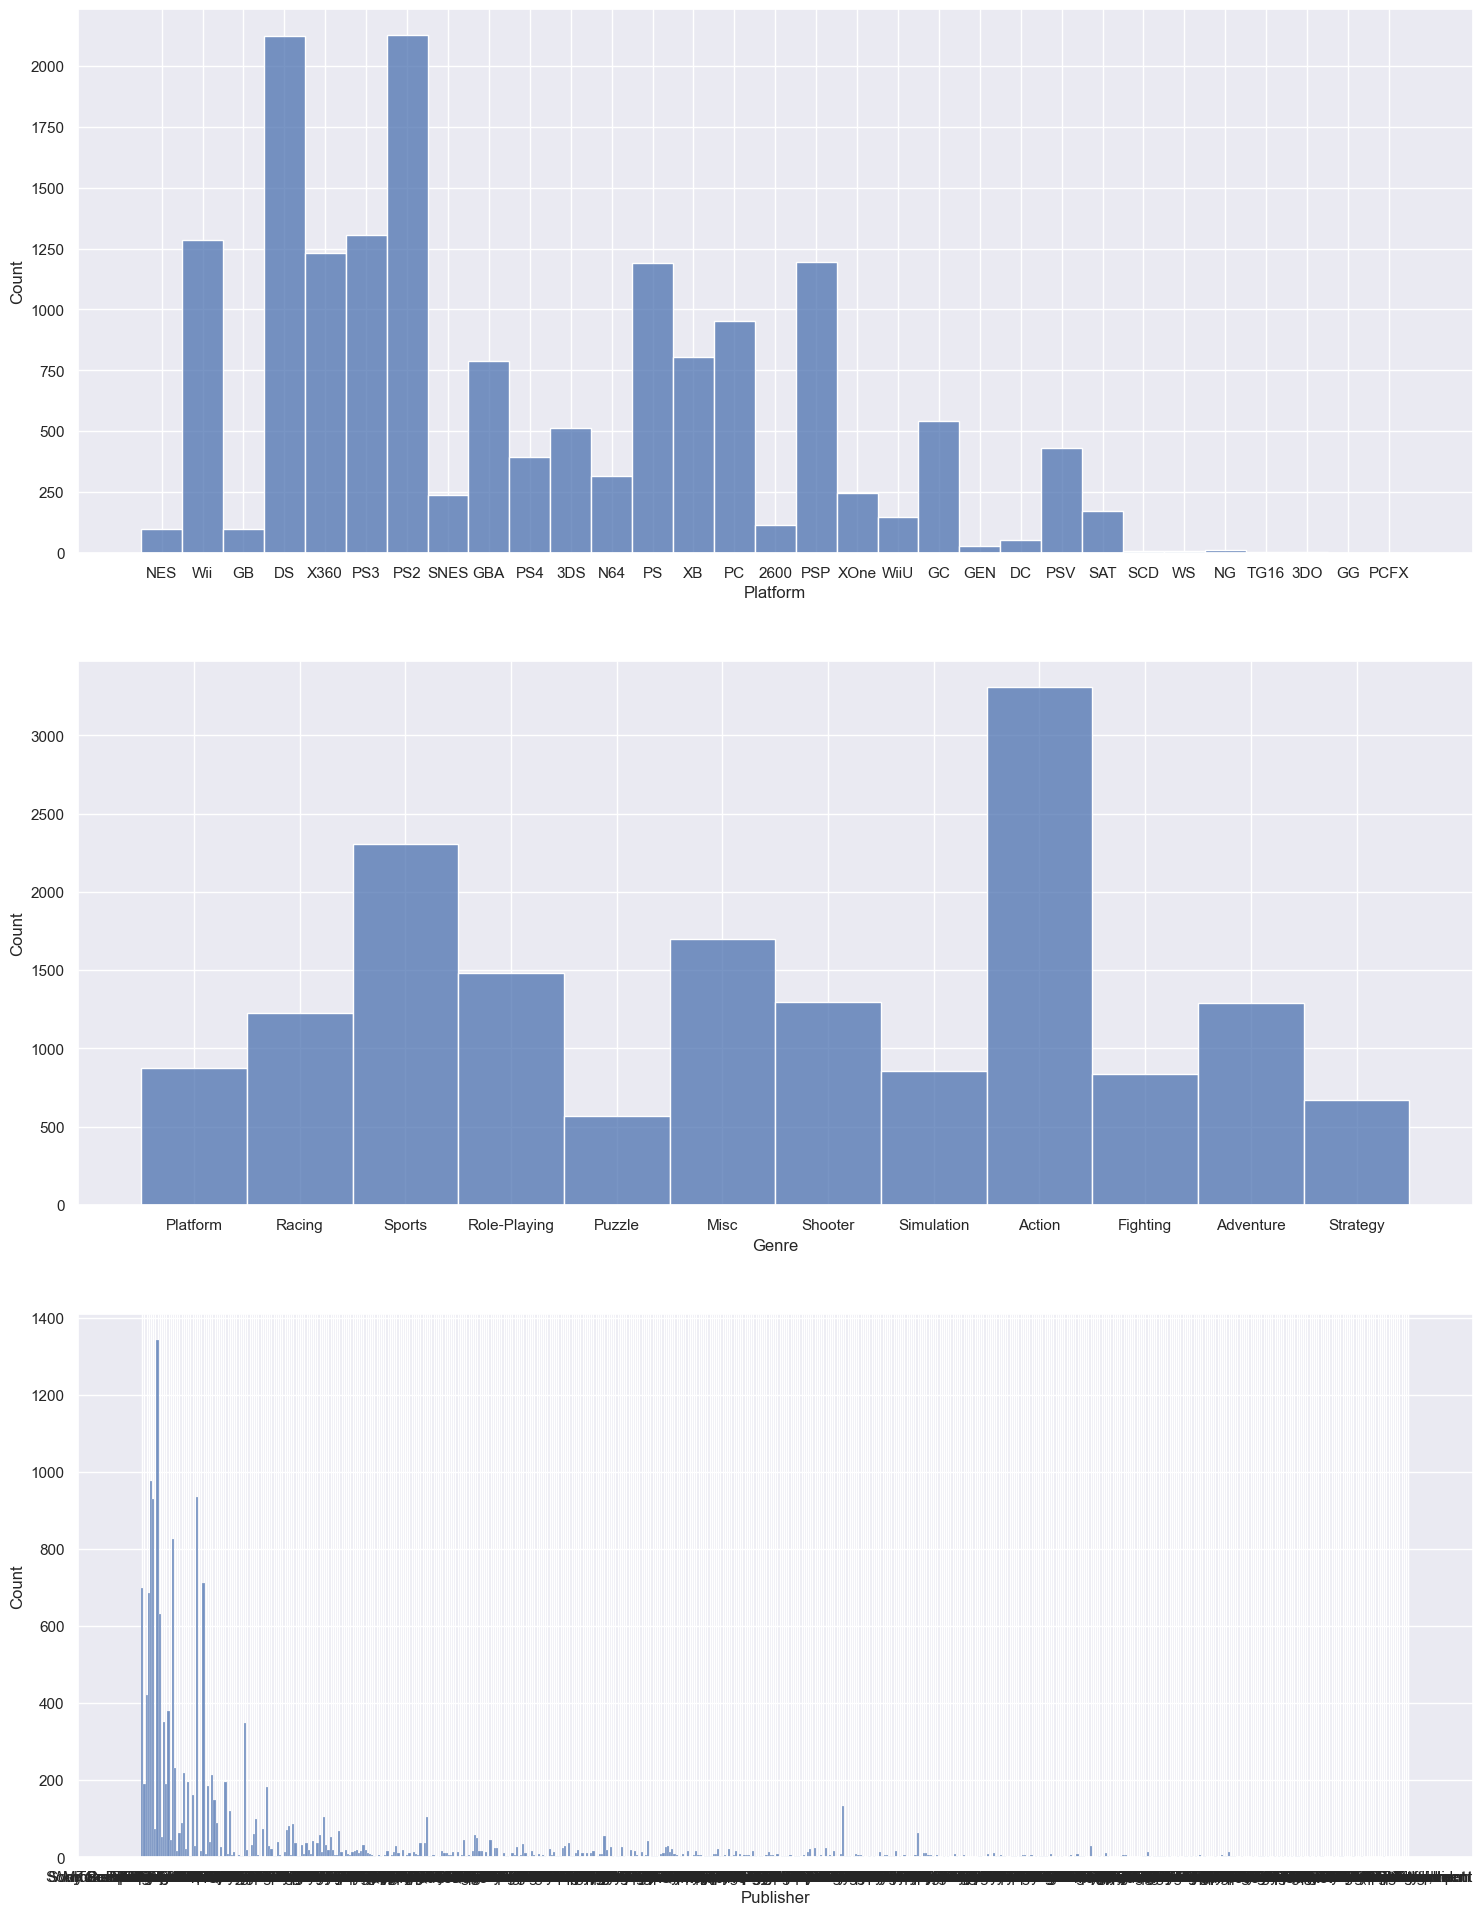

In [9]:
f, axes = plt.subplots(3, 1, figsize=(18, 24))

count = 0
for var in catdf:
    sb.histplot(data = catdf[var], ax = axes[count])
    count += 1

#### Normalising the distribution

In [10]:
def normalise_column(df, var):
    df[f"{var}_Normalised"] = df[var].apply(lambda x: x ** (1/3))

In [11]:
for var in ["NA_Sales", "JP_Sales", "EU_Sales", "Other_Sales", "Global_Sales"]:
    normalise_column(df, var)

df.head()

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_Sales_Normalised,JP_Sales_Normalised,EU_Sales_Normalised,Other_Sales_Normalised,Global_Sales_Normalised
Name,,,,,,,,,,,,,,
Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,3.075139,1.895465,1.529775,0.916566,3.426778
Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,2.502930,1.559121,2.336775,1.487300,3.287186
Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,2.499200,1.485792,2.219253,1.434192,3.200065
Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,2.242029,2.170119,2.071575,1.000000,3.153829
Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,2.852086,1.615986,1.312309,0.833955,3.116183


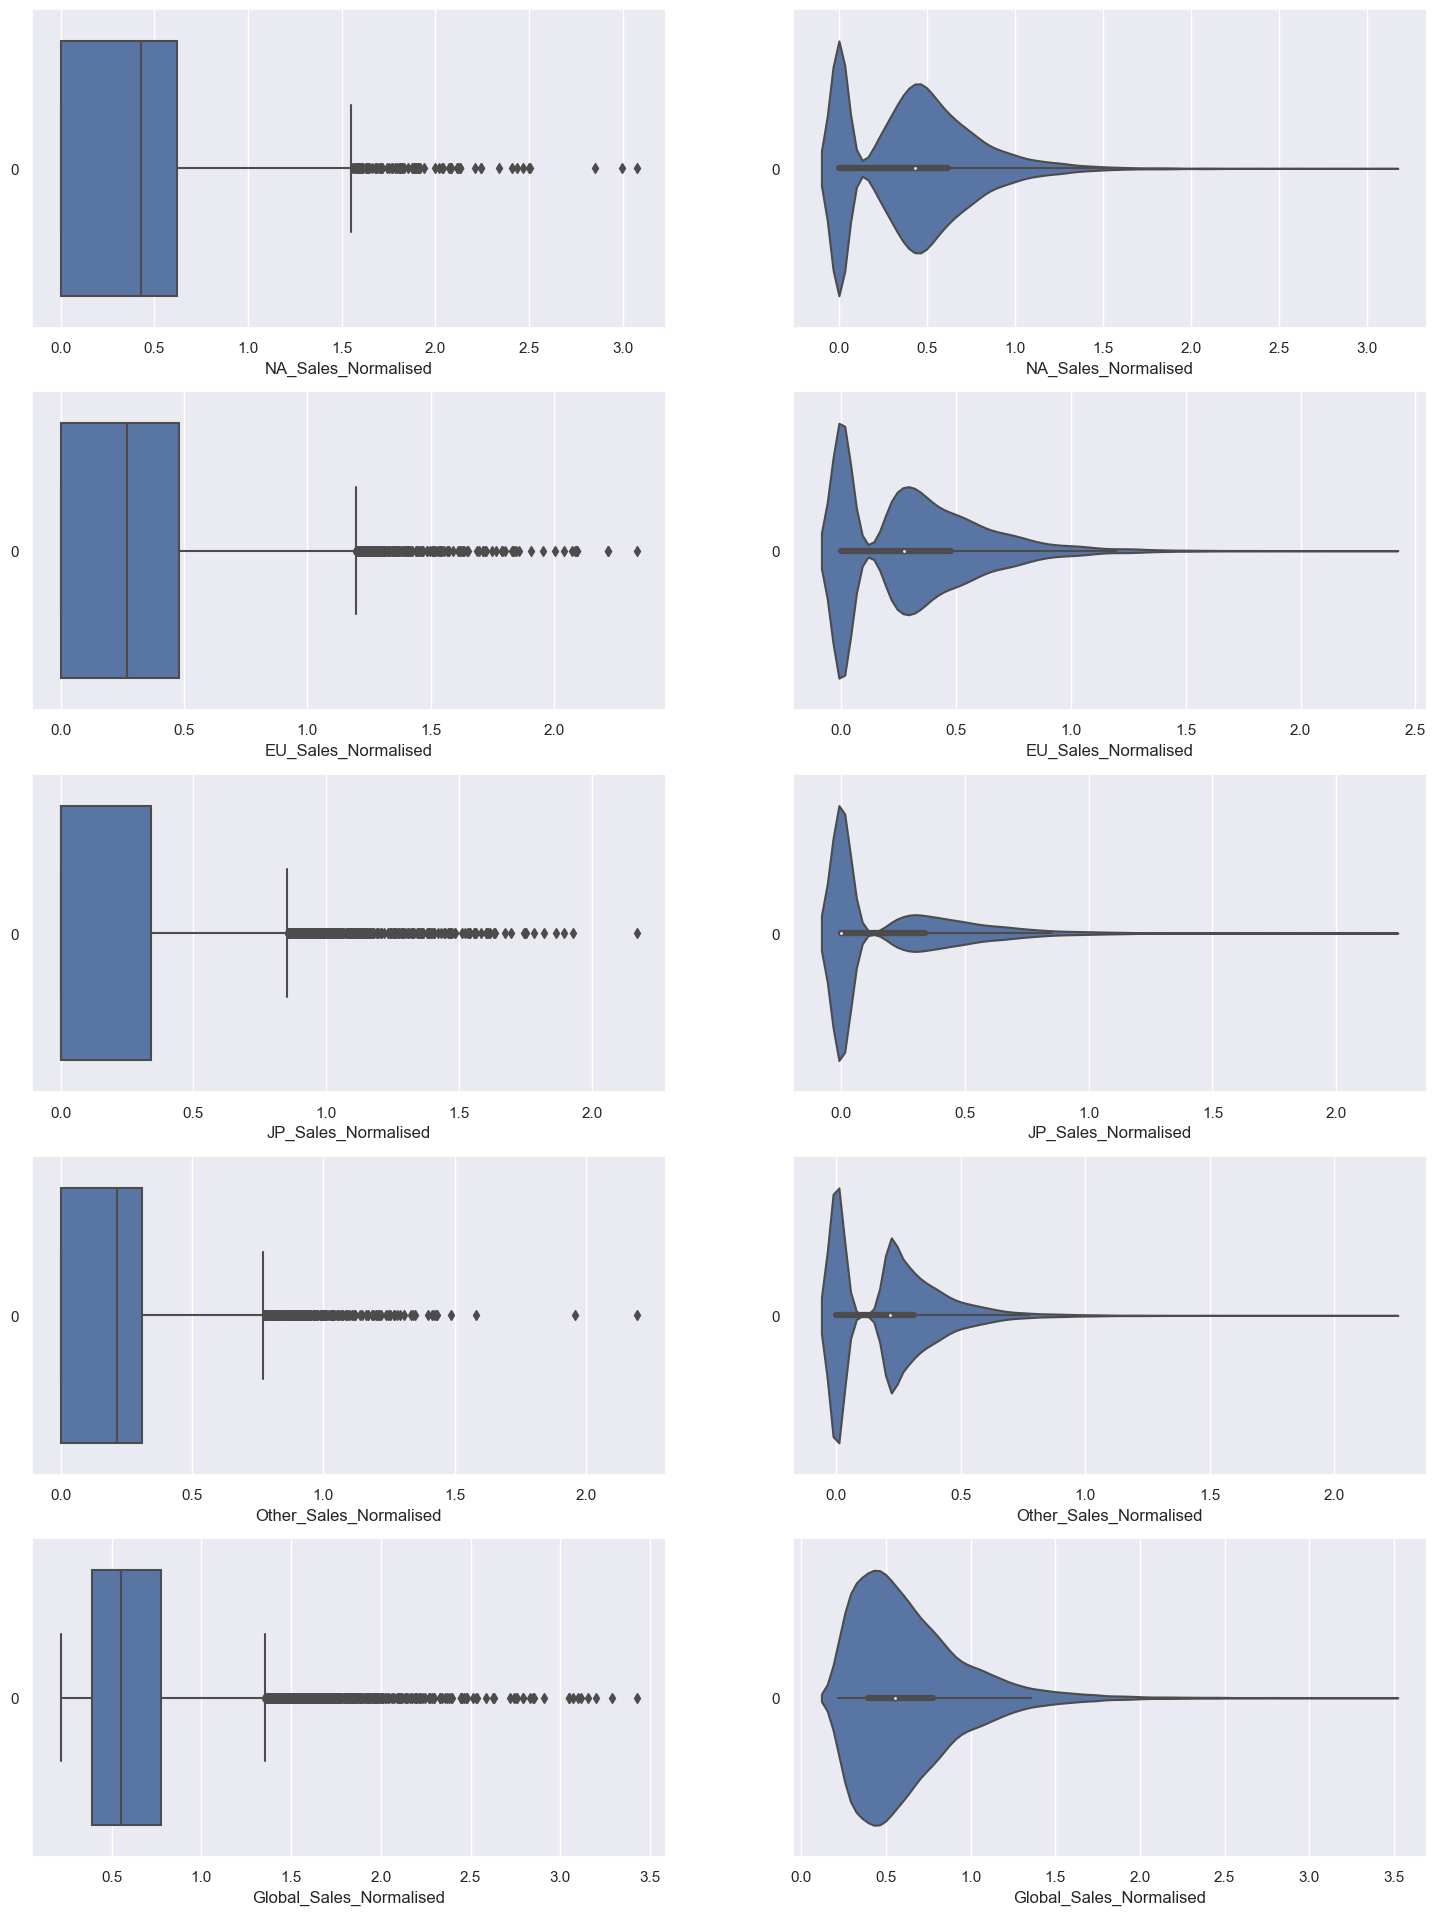

In [12]:
numdf = df[["NA_Sales_Normalised", "EU_Sales_Normalised", "JP_Sales_Normalised", "Other_Sales_Normalised", "Global_Sales_Normalised"]]
f, axes = plt.subplots(5, 2, figsize=(18, 24))

count = 0
for var in numdf:
    sb.boxplot(data = numdf[var], orient = "h", ax = axes[count,0])
    axes[count, 0].set_xlabel(var)
    sb.violinplot(data = numdf[var], orient = "h", ax = axes[count,1])
    axes[count, 1].set_xlabel(var)
    count += 1

## Model 1: Random Forest Classifier

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

#predictor and response
x = df[['Platform', 'Year_of_Release', 'Genre', 'Publisher']]
y = df['Global_Sales_Normalised']

#encoding
label_encoders = {}
for predictor in ['Platform', 'Genre', 'Publisher']:
    label_encoders[predictor] = LabelEncoder()
    x[predictor] = label_encoders[predictor].fit_transform(x[predictor])

#train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
    
#hyperparameters
param_grid = {
    'max_depth': [50, 75, 100],
    'max_features': [2, 3, 4],
    'min_samples_split': [25, 50, 100]
}
    
#generate random forest
rf = RandomForestRegressor(n_estimators=100, random_state=None)
rf.fit(x_train, y_train)
    
#tuning of hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

best_rf = grid_search.best_estimator_
    
#predict global sales
y_train_pred = best_rf.predict(x_train)
y_test_pred = best_rf.predict(x_test)

#power of 3 to undo normalisation
mse = mean_squared_error(y_train**3, y_train_pred**3)
rmse = np.sqrt(mse)
print("RMSE for train:", rmse)

mse = mean_squared_error(y_test**3, y_test_pred**3)
rmse = np.sqrt(mse)
print("RMSE for test:", rmse)

C:\Users\cheri\AppData\Local\Temp\ipykernel_7060\2530746238.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[predictor] = label_encoders[predictor].fit_transform(x[predictor])


RMSE for train: 1.23415211078427
RMSE for test: 1.4728693768789964


#### Results Analysis

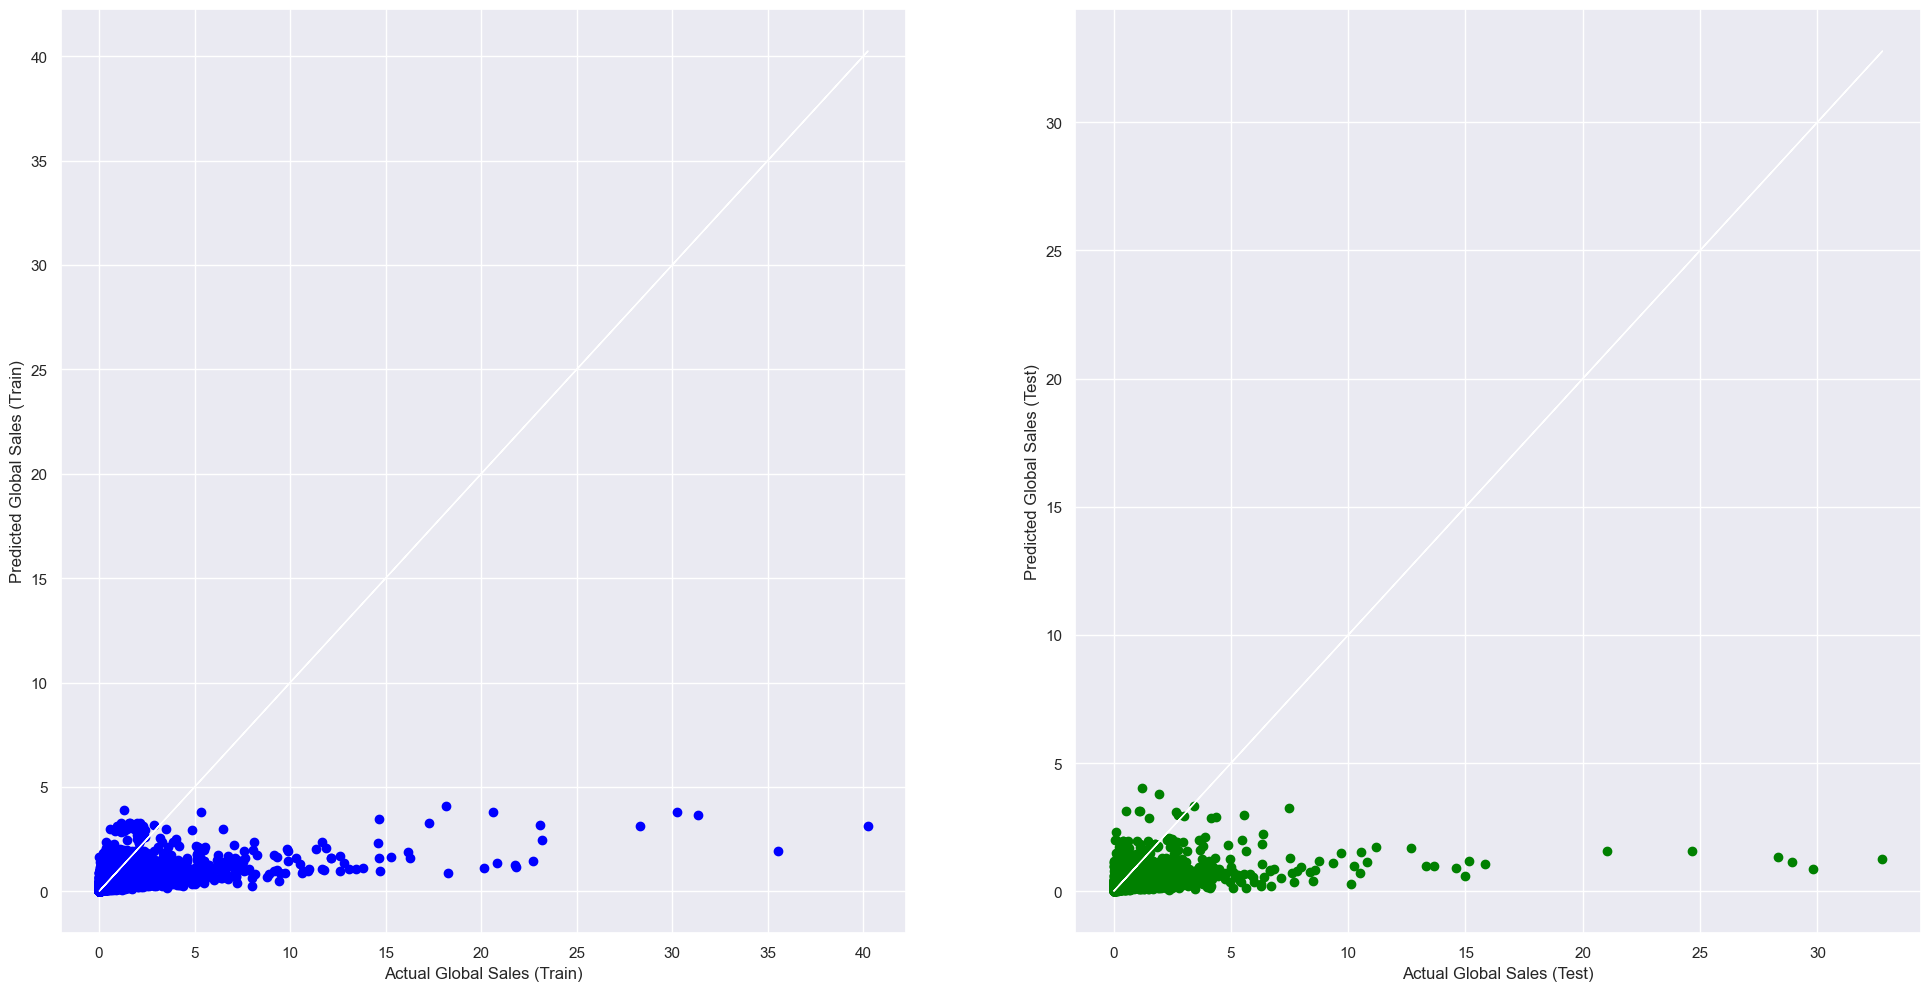

In [15]:
#power of 3 to undo normalisation
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train**3, y_train_pred**3, color = "blue")
axes[0].plot(y_train**3, y_train**3, 'w-', linewidth = 1)
axes[0].set_xlabel("Actual Global Sales (Train)")
axes[0].set_ylabel("Predicted Global Sales (Train)")
axes[1].scatter(y_test**3, y_test_pred**3, color = "green")
axes[1].plot(y_test**3, y_test**3, 'w-', linewidth = 1)
axes[1].set_xlabel("Actual Global Sales (Test)")
axes[1].set_ylabel("Predicted Global Sales (Test)")
plt.show()

In [16]:
corr = np.corrcoef(y_train, y_train_pred)[0, 1]
print("Correlation for train:", corr)

corr = np.corrcoef(y_test, y_test_pred)[0, 1]
print("Correlation for test:", corr)

Correlation for train: 0.7097933824947346
Correlation for test: 0.6043289849257643


In [17]:
#get feature importances
feat_impts = best_rf.feature_importances_

feat_impt_df = pd.DataFrame({
    'Feature': x_test.columns,
    'Importance': feat_impts
})

#feat_impt_df = feat_impt_df.sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feat_impt_df)

Feature Importance:
           Feature  Importance
0         Platform    0.170617
1  Year_of_Release    0.224610
2            Genre    0.150389
3        Publisher    0.454384


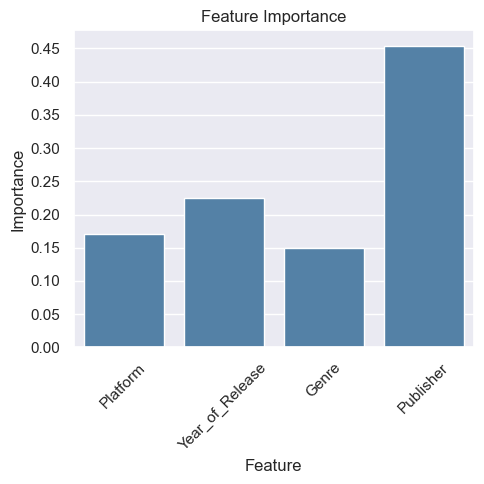

In [18]:
#histogram of importances
plt.figure(figsize=(5, 5))
sb.barplot(x='Feature', y='Importance', data=feat_impt_df, color='steelblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 0.5, 0.05))
plt.tight_layout()
plt.show()

## Model 2: Gradient Boosting Machines (GBM) using xgboost

In [19]:
import xgboost as xgb
from tqdm import tqdm
import time  # Import time module

#model training
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', seed=42)

#initialize tqdm with the total number of epochs (number of boosting rounds)
num_epochs = 100  # Change this to the desired number of epochs
start_time = time.time()  # Record start time
with tqdm(total=num_epochs, desc="Training") as pbar:
    for i in range(num_epochs):
        xg_reg.fit(x_train, y_train, eval_set=[(x_test, y_test)], verbose=False)  # Note: verbose=False to suppress output
        pbar.update(1)  # Update the progress bar
        elapsed_time = time.time() - start_time  # Calculate elapsed time
        trials_per_sec = (i + 1) / elapsed_time  # Calculate trials per second
        pbar.set_postfix(trials_per_sec=trials_per_sec)  # Update the progress bar with trials per second

#predictions on train data
y_train_pred = xg_reg.predict(x_train)

#model evaluation on train data
rmse_train = np.sqrt(mean_squared_error(y_train**3, y_train_pred**3))
print("Root Mean Squared Error on train data:", rmse_train)

#predictions on test data
y_test_pred = xg_reg.predict(x_test)

#model evaluation on test data
rmse_test = np.sqrt(mean_squared_error(y_test**3, y_test_pred**3))
print("Root Mean Squared Error on test data:", rmse_test)

#compute correlation coefficient for train data
corr_train = np.corrcoef(y_train, y_train_pred)[0, 1]
print("Correlation coefficient for train data:", corr_train)

#compute correlation coefficient for test data
corr_test = np.corrcoef(y_test, y_test_pred)[0, 1]
print("Correlation coefficient for test data:", corr_test)

Training: 100%|█████████████████████████████████████████████████| 100/100 [00:11<00:00,  8.79it/s, trials_per_sec=8.79]

Root Mean Squared Error on train data: 1.1284783542124865
Root Mean Squared Error on test data: 1.4306436919430459
Correlation coefficient for train data: 0.7461012433551375
Correlation coefficient for test data: 0.6234596939446958


**Feature Importance**

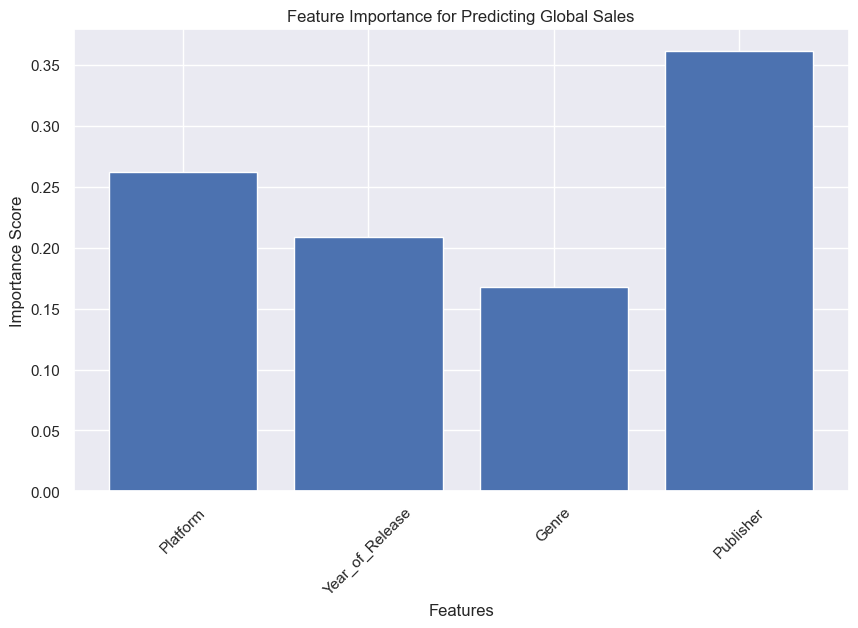

In [20]:
# Feature importance analysis
feature_importance = xg_reg.feature_importances_
feature_names = x_train.columns

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance for Predicting Global Sales')
plt.xticks(rotation=45)
plt.show()